In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data=pd.read_csv(r"C:\ML pratice\medical_insurance_cost_prediction\insurance.csv")

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
data.shape

(1338, 7)

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# contains  categorical Features are sex,smoker,region in dataset

C:\Users\sande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


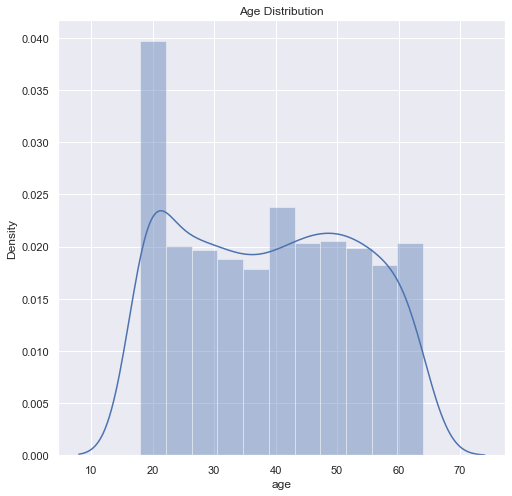

In [16]:
#data analysis

#Distribution of age value

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

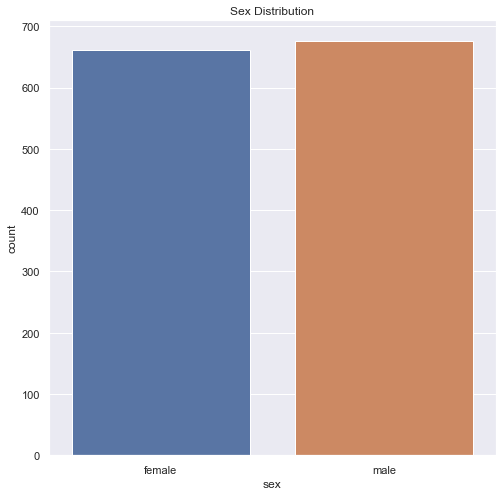

In [18]:
# Distribution for gender value

plt.figure(figsize=(8,8))
sns.countplot(x='sex',data=data)
plt.title('Sex Distribution')

In [19]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\sande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


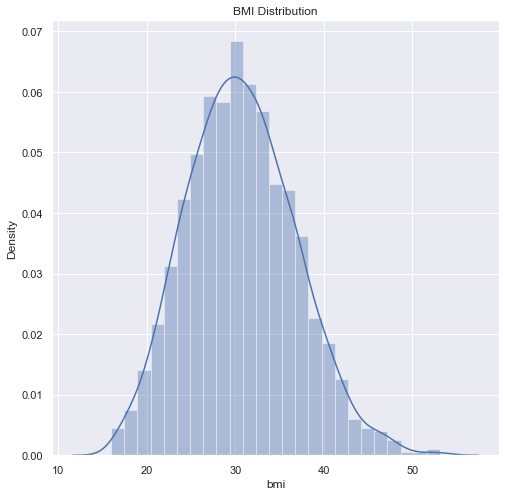

In [20]:
# Distribution for bmi

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

In [22]:
# Normal BMI Range --> 18.5 to 24.9


Text(0.5, 1.0, 'Children')

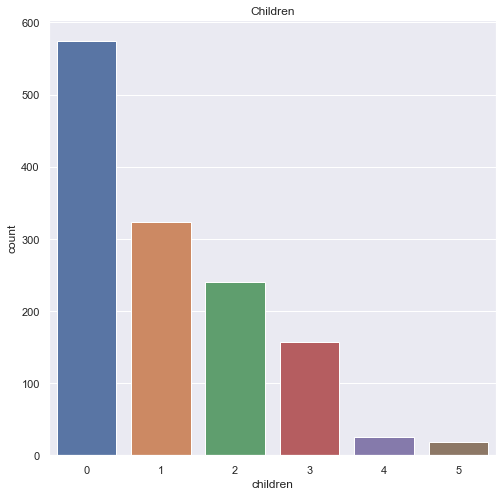

In [23]:
# Children Column

plt.figure(figsize=(8,8))
sns.countplot(x='children',data=data)
plt.title('Children')

In [24]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'smoker')

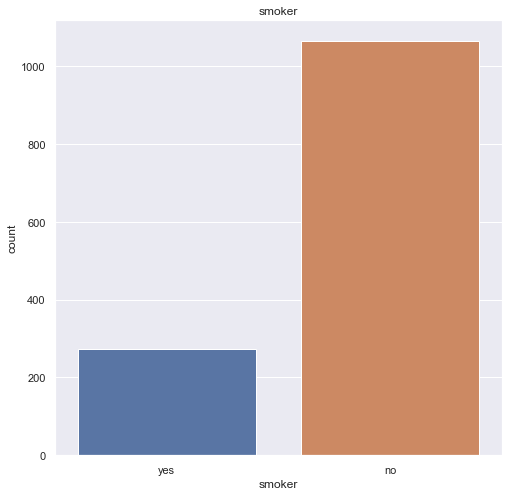

In [25]:
# Smoker Column

plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data=data)
plt.title('smoker')

In [26]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Region')

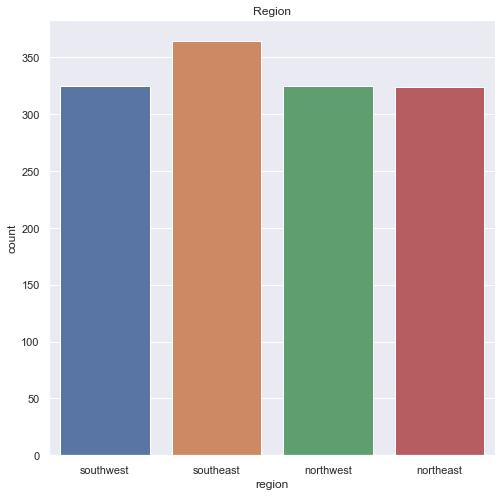

In [27]:
# Region column

plt.figure(figsize=(8,8))
sns.countplot(x='region',data=data)
plt.title('Region')

In [28]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\sande\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


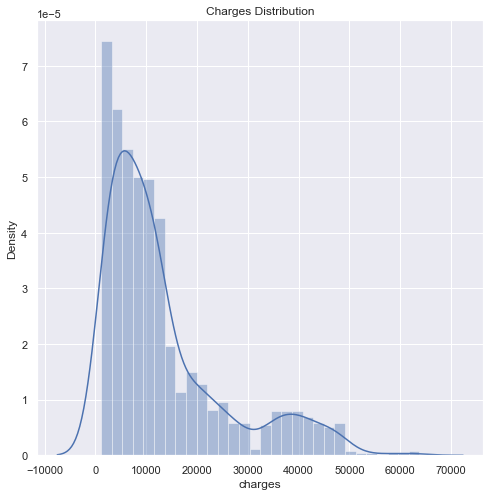

In [29]:
# Charges Distribution

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

In [30]:
data.replace({'smoker':{'yes':1 , 'no':0}},inplace=True)
data.replace({'sex':{'male':1 , 'female':0}},inplace=True)
data.replace({'region':{'southeast':0 , 'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [32]:
x=data.drop('charges',axis=1)
y=data['charges']
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]


In [33]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [36]:
model=LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
training_data_prediction=model.predict(x_train)
print("R Squared Error value for training data is : ",metrics.r2_score(training_data_prediction,y_train))


R Squared Error value for training data is :  0.6693380032904603


In [40]:
test_data_prediction=model.predict(x_test)
print("R Squared Error value for test data is : ",metrics.r2_score(test_data_prediction,y_test))

R Squared Error value for test data is :  0.660665998605892


In [42]:
#Predictive System

input_data=(33,1,22.705,0,0,3)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshape)
print(prediction)

[3869.92920489]


C:\Users\sande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
